# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Ajisaka Arsyi Taj
- **Email:** sakaaji289@gmail.com
- **ID Dicoding:** ajisakarsyi

## Menentukan Pertanyaan Bisnis

- Apabila ingin mengekspansi kuantitas produk dalam waktu yang terbatas, hari apa yang menjadi hari yang ideal untuk mengimplementasikan ekspansi tersebut?
- Anggap sebuah toko rental sepeda harus tutup sekali dalam sehari untuk beristirahat dan kembali membuka tokonya di hari berikutnya, maka pada jam berapa toko tersebut sebaiknya tutup dan buka kembali?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv('https://raw.githubusercontent.com/ajisakarsyi/bangkit-analisis-data/refs/heads/main/data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv('https://raw.githubusercontent.com/ajisakarsyi/bangkit-analisis-data/refs/heads/main/data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset dibagi berdasarkan jarak waktu antar evaluasi: per jam dan per hari.
- Data mengandung beberapa atribut kategoris, seperti *season*, *weekday*, dan sebagainya.
- Atribut yang sifatnya numerik apabila hanya terdapat sangat sedikit (ex: *yr*) dibuat menjadi atribut yang kategoris juga.

### Assessing Data

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [10]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- Data sudah sangat lengkap. Tidak ada NULL value, karena setiap kolom harus terisi setidaknya satu value untuk merepresentasikan kondisi atributnya masing-masing.
- Data yang kategoris memiliki tipe data *int64* karena setiap angkanya merepresentasikan suatu kondisi di dalam kategori tersebut (Contoh: *yr* = 1 untuk 2012).
- Data pada tiap sel sudah lengkap tanpa missing value karena tiap sel harus terisi setidaknya satu value untuk merepresentasikan keadaan atribut tersebut (Contoh: apabila tidak ada angin pada jam tertentu, maka atribut *windspeed* akan terisi 0, bukan NULL).
- Atribut *dteday* seharusnya bertipe datetime. Ini akan di-handle di pembersihan data.

### Cleaning Data

In [15]:
day_df['dteday'] = pd.to_datetime(day_df['dteday']) # mengubah tipe data menjadi datetime

# menambah kolom baru agar merepresentasikan int di season sebagai string
season_map = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
day_df['season_obj'] = day_df['season'].map(season_map).astype('object')

# menambah kolom baru agar merepresentasikan int di yr sebagai string
year_map = {0: 2011, 1: 2012}
day_df['yr_obj'] = day_df['yr'].map(year_map).astype('object')

# menambah kolom baru agar merepresentasikan int di mnth sebagai string
month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
             7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
day_df['mnth_obj'] = day_df['mnth'].map(month_map).astype('object')

# menambah kolom baru agar merepresentasikan int di holiday sebagai string
holiday_map = {0: 'not holiday', 1: 'holiday'}
day_df['holiday_obj'] = day_df['holiday'].map(holiday_map).astype('object')

# menambah kolom baru agar merepresentasikan int di weekday sebagai string
weekday_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday',
               5: 'Saturday', 6: 'Sunday'}
day_df['weekday_obj'] = day_df['weekday'].map(weekday_map).astype('object')

# menambah kolom baru agar merepresentasikan int di workingday sebagai string
workingday_map = {1: 'workingday', 0: 'not workingday'}
day_df['workingday_obj'] = day_df['workingday'].map(workingday_map).astype('object')

# menambah kolom baru agar merepresentasikan int di weathersit sebagai string
weathersit_map = {1: 'clear', 2: 'mist', 3: 'light snow', 4: 'heavy rain'}
day_df['weathersit_obj'] = day_df['weathersit'].map(weathersit_map).astype('object')

print(day_df[['season', 'season_obj', 'yr', 'yr_obj', 'mnth', 'mnth_obj', 'holiday', 'holiday_obj',
              'weekday', 'weekday_obj', 'workingday', 'workingday_obj', 'weathersit', 'weathersit_obj']].head())

day_df.info()

hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# menambah kolom baru agar merepresentasikan int di season sebagai string
season_map = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
hour_df['season_obj'] = hour_df['season'].map(season_map).astype('object')

# menambah kolom baru agar merepresentasikan int di yr sebagai string
year_map = {0: 2011, 1: 2012}
hour_df['yr_obj'] = hour_df['yr'].map(year_map).astype('object')

# menambah kolom baru agar merepresentasikan int di mnth sebagai string
month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
             7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
hour_df['mnth_obj'] = hour_df['mnth'].map(month_map).astype('object')

# menambah kolom baru agar merepresentasikan int di holiday sebagai string
holiday_map = {0: 'not holiday', 1: 'holiday'}
hour_df['holiday_obj'] = hour_df['holiday'].map(holiday_map).astype('object')

# menambah kolom baru agar merepresentasikan int di weekday sebagai string
weekday_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday',
               5: 'Saturday', 6: 'Sunday'}
hour_df['weekday_obj'] = hour_df['weekday'].map(weekday_map).astype('object')

# menambah kolom baru agar merepresentasikan int di workingday sebagai string
workingday_map = {1: 'workingday', 0: 'not workingday'}
hour_df['workingday_obj'] = hour_df['workingday'].map(workingday_map).astype('object')

# menambah kolom baru agar merepresentasikan int di weathersit sebagai string
weathersit_map = {1: 'clear', 2: 'mist', 3: 'light snow', 4: 'heavy rain'}
hour_df['weathersit_obj'] = hour_df['weathersit'].map(weathersit_map).astype('object')

print(hour_df[['season', 'season_obj', 'yr', 'yr_obj', 'mnth', 'mnth_obj', 'holiday', 'holiday_obj',
               'weekday', 'weekday_obj', 'workingday', 'workingday_obj', 'weathersit', 'weathersit_obj']].head())

hour_df.info()

   season season_obj  yr yr_obj  mnth mnth_obj  holiday  holiday_obj  weekday  \
0       1     spring   0   2011     1  January        0  not holiday        6   
1       1     spring   0   2011     1  January        0  not holiday        0   
2       1     spring   0   2011     1  January        0  not holiday        1   
3       1     spring   0   2011     1  January        0  not holiday        2   
4       1     spring   0   2011     1  January        0  not holiday        3   

  weekday_obj  workingday  workingday_obj  weathersit weathersit_obj  
0      Sunday           0  not workingday           2           mist  
1      Monday           0  not workingday           2           mist  
2     Tuesday           1      workingday           1          clear  
3   Wednesday           1      workingday           1          clear  
4    Thursday           1      workingday           1          clear  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (t

**Insight:**
- Atribut *dteday* berhasil diubah dari tipe object menjadi tipe datetime.
- Menambah kolom baru agar dapat merepresentasikan data yang bersifat kategoris.

## Exploratory Data Analysis (EDA)

### Explore

In [16]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,casual,registered,cnt,season_obj,yr_obj,mnth_obj,holiday_obj,weekday_obj,workingday_obj,weathersit_obj
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,...,731.000000,731.000000,731.000000,731,731.0,731,731,731,731,731
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4,2.0,12,2,7,2,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,fall,2012.0,January,not holiday,Sunday,workingday,clear
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,188,366.0,62,710,105,500,463
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,...,848.176471,3656.172367,4504.348837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,...,2.000000,20.000000,22.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,...,315.500000,2497.000000,3152.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,...,713.000000,3662.000000,4548.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,...,1096.000000,4776.500000,5956.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,...,3410.000000,6946.000000,8714.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
day_df.groupby(by="weekday_obj").agg({ # membuat pivot table dengan variabel weekday sebagai key dan 12 parameter lainnya sebagai value
    "casual": ["max", "min", "mean", "std"],
    "registered": ["max", "min", "mean", "std"],
    "cnt": ["max", "min", "mean", "std"]
})

casual                              registered                     \
               max min         mean         std        max   min         mean   
weekday_obj                                                                     
Friday        1405  15   590.961538  371.680307       6781   416  4076.298077   
Monday        3283  54  1338.295238  809.324777       5657   451  2890.533333   
Saturday      2469  38   752.288462  483.422400       6917  1129  3938.000000   
Sunday        3410  57  1465.257143  927.082884       5966   570  3085.285714   
Thursday      2562   9   551.144231  401.808954       6946   432  3997.394231   
Tuesday       3065   2   674.133333  493.777298       6435    20  3663.990476   
Wednesday     1348   9   556.182692  342.748705       6697   573  3954.480769   

                           cnt                                  
                     std   max   min         mean          std  
weekday_obj                                                     
Friday       1642.753330  7804   431  4667.259615  1939.433317  
Monday       1179.713036  8227   605  4228.828571  1872.496629  
Saturday     1494.998698  8362  1167  4690.288462  1874.624870  
Sunday       1358.068784  8714   627  4550.542857  2196.693009  
Thursday     1723.710208  8173   441  4548.538462  2038.095884  
Tuesday      1504.215925  7525    22  4338.123810  1793.074013  
Wednesday    1549.462149  7767   683  4510.663462  1826.911642

In [18]:
day_df.groupby(by="weekday_obj").cnt.mean().sort_values(ascending=False).reset_index() # mengurutkan pivot table berdasarkan rata-rata dari cnt

,weekday_obj,cnt
0,Saturday,4690.288462
1,Friday,4667.259615
2,Sunday,4550.542857
3,Thursday,4548.538462
4,Wednesday,4510.663462
5,Tuesday,4338.123810
6,Monday,4228.828571


In [19]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,casual,registered,cnt,season_obj,yr_obj,mnth_obj,holiday_obj,weekday_obj,workingday_obj,weathersit_obj
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379,17379.0,17379,17379,17379,17379,17379
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4,2.0,12,2,7,2,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,fall,2012.0,May,not holiday,Sunday,workingday,clear
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4496,8734.0,1488,16879,2512,11865,11413
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,...,35.676218,153.786869,189.463088,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,...,4.000000,34.000000,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,...,17.000000,115.000000,142.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,...,48.000000,220.000000,281.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,...,367.000000,886.000000,977.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
hour_df.groupby(by="hr").agg({
    "casual": ["max", "min", "mean", "std"],
    "registered": ["max", "min", "mean", "std"],
    "cnt": ["max", "min", "mean", "std"]
})

casual                           registered                              \
      max min       mean        std        max min        mean         std   
hr                                                                           
0      68   0  10.158402  10.667953        234   0   43.739669   34.019585   
1      49   0   6.504144   7.735334        139   0   26.871547   27.344153   
2      44   0   4.772028   6.514780        104   0   18.097902   21.303895   
3      26   0   2.715925   4.315795         61   0    9.011478    9.743691   
4      13   0   1.253945   1.887669         22   0    5.098996    3.134479   
5      16   0   1.411437   1.790581         64   0   18.478382   12.674751   
6      19   0   4.161379   3.691509        203   0   71.882759   53.535307   
7      40   0  11.055021   8.356205        572   1  201.009629  157.120459   
8      69   0  21.679505  13.741229        808   4  337.331499  229.698404   
9     142   0  30.891334  24.472856        399   6  188.418157   84.633490   
10    209   0  46.477304  41.346206        351   8  127.191197   66.281668   
11    268   0  59.540578  54.481788        446   5  148.602476   79.090301   
12    362   0  68.293956  64.394237        526   3  185.021978   89.240873   
13    355   0  72.308642  69.819228        491   9  181.352538   87.424775   
14    361   0  75.567901  71.599225        502  12  165.381344   84.055205   
15    357   0  74.905350  70.289359        456   4  176.327846   84.488219   
16    367   0  73.745205  67.015206        481   8  238.238356  103.765726   
17    347   0  74.273973  61.491021        885  14  387.178082  211.676303   
18    266   0  61.120879  50.981553        886  20  364.390110  203.599896   
19    230   0  48.770604  42.328913        662  11  262.752747  138.708622   
20    237   0  36.233516  32.103347        461   8  189.796703  100.293791   
21    222   0  28.255495  25.378252        362   6  144.059066   73.149848   
22    175   0  22.252747  20.450211        327   5  109.082418   55.252765   
23     71   0  15.199176  13.804596        220   2   72.631868   40.446431   

    cnt                              
    max min        mean         std  
hr                                   
0   283   2   53.898072   42.307910  
1   168   1   33.375691   33.538727  
2   132   1   22.869930   26.578642  
3    79   1   11.727403   13.239190  
4    28   1    6.352941    4.143818  
5    66   1   19.889819   13.200765  
6   213   1   76.044138   55.084348  
7   596   1  212.064649  161.441936  
8   839   5  359.011004  235.189285  
9   426  14  219.309491   93.703458  
10  539   8  173.668501  102.205413  
11  663  10  208.143054  127.495536  
12  776   3  253.315934  145.081134  
13  760  11  253.661180  148.107657  
14  750  12  240.949246  147.271574  
15  750   7  251.233196  144.632541  
16  783  11  311.983562  148.682618  
17  976  15  461.452055  232.656611  
18  977  23  425.510989  224.639304  
19  743  11  311.523352  161.050359  
20  567  11  226.030220  119.670164  
21  584   6  172.314560   89.788893  
22  502   9  131.335165   69.937782  
23  256   2   87.831044   50.846889

In [21]:
hour_df.groupby(by="hr").cnt.mean().sort_values(ascending=True).reset_index()

,hr,cnt
0,4,6.352941
1,3,11.727403
2,5,19.889819
3,2,22.869930
4,1,33.375691
5,0,53.898072
6,6,76.044138
7,23,87.831044
8,22,131.335165
9,21,172.314560


**Insight:**
- Melakukan pengurutan terhadap *day_df* berdasarkan atribut *cnt* terhadap *weekday*.
- Melakukan pengurutan terhadap *hour_df* berdasarkan atribut *cnt* terhadap *hr*.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

### Apabila ingin mengekspansi kuantitas produk dalam waktu yang terbatas, hari apa yang menjadi hari yang ideal untuk mengimplementasikan ekspansi tersebut?

In [22]:
sum_day_sales_byday_top = day_df.groupby(by="weekday_obj").cnt.mean().sort_values(ascending=False).reset_index()
sum_day_sales_byday_top.head(3)
sum_day_sales_byday_bottom = day_df.groupby(by="weekday_obj").cnt.mean().sort_values(ascending=True).reset_index()
sum_day_sales_byday_bottom.head(3)

,weekday_obj,cnt
0,Monday,4228.828571
1,Tuesday,4338.123810
2,Wednesday,4510.663462


<ipython-input-23-b40850aa9029>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weekday_obj", y="cnt", data=sum_day_sales_byday_top.head(3), palette=colors, ax=ax[0])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: Futu

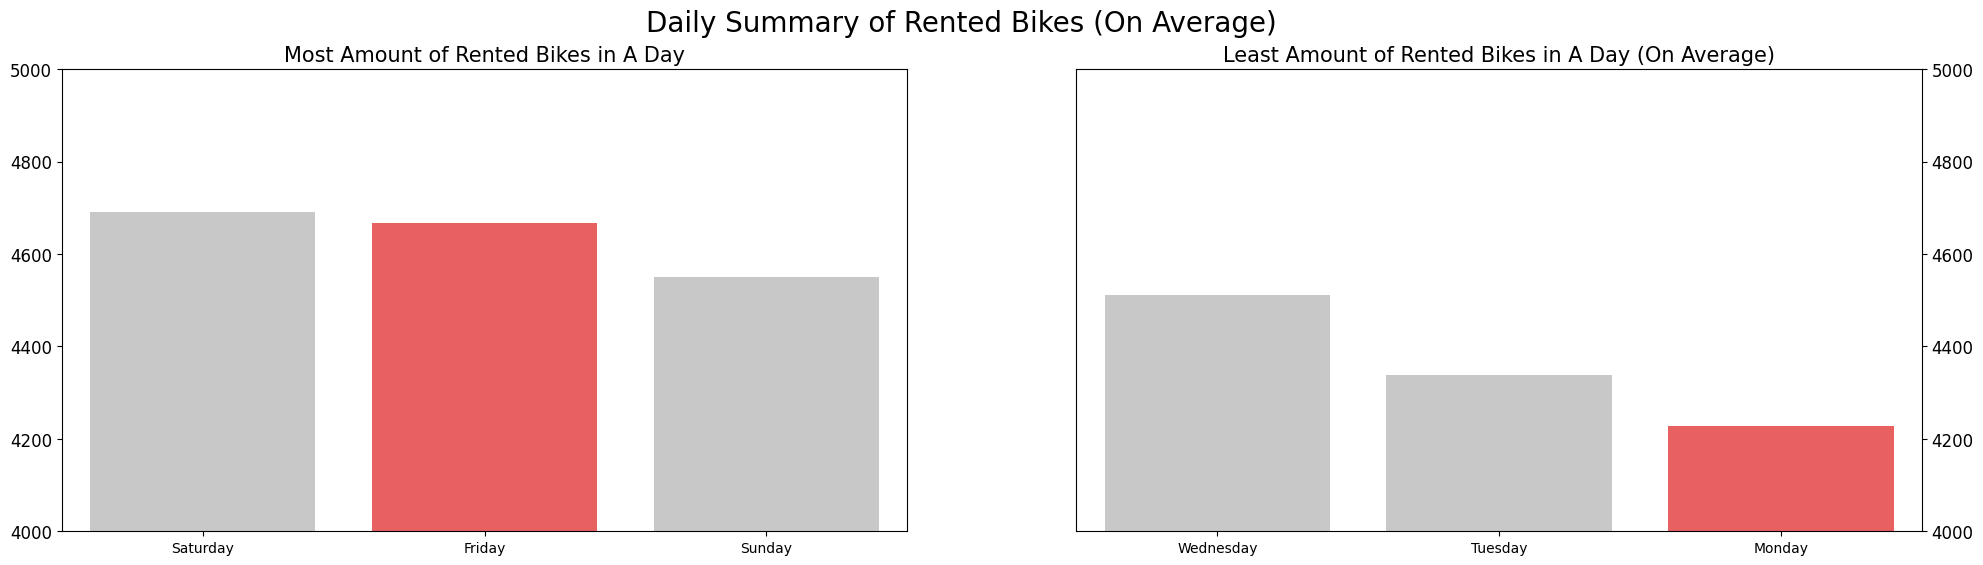

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6)) # membuat barplot

colors = ["#c8c8c8", "#fe4b4b", "#c8c8c8"]
reverse_colors = ["#fe4b4b", "#c8c8c8", "#c8c8c8"]

sns.barplot(x="weekday_obj", y="cnt", data=sum_day_sales_byday_top.head(3), palette=colors, ax=ax[0])
ax[0].set_ylabel(None) # label sumbu y
ax[0].set_xlabel(None) # label sumbu x
ax[0].set_title("Most Amount of Rented Bikes in A Day", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
ax[0].set_ylim(4000,5000) # batas sumbu y

sns.barplot(x="weekday_obj", y="cnt", data=sum_day_sales_byday_bottom.head(3), palette=reverse_colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Least Amount of Rented Bikes in A Day (On Average)", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].set_ylim(4000,5000)

plt.suptitle("Daily Summary of Rented Bikes (On Average)", fontsize=20)
plt.show()

### Pertanyaan 2:

### Anggap sebuah toko rental sepeda harus tutup sekali dalam sehari untuk beristirahat dan kembali membuka tokonya di hari berikutnya, maka pada jam berapa toko tersebut sebaiknya tutup dan buka kembali?

In [24]:
sum_hour_sales_byhour_top = hour_df.groupby(by="hr").cnt.mean().sort_values(ascending=False).reset_index()
sum_hour_sales_byhour_top

,hr,cnt
0,17,461.452055
1,18,425.510989
2,8,359.011004
3,16,311.983562
4,19,311.523352
5,13,253.661180
6,12,253.315934
7,15,251.233196
8,14,240.949246
9,20,226.030220


<ipython-input-25-3e104813b50e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hr", y="cnt", data=sum_hour_sales_byhour_top, palette=colors, ax=ax)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When g

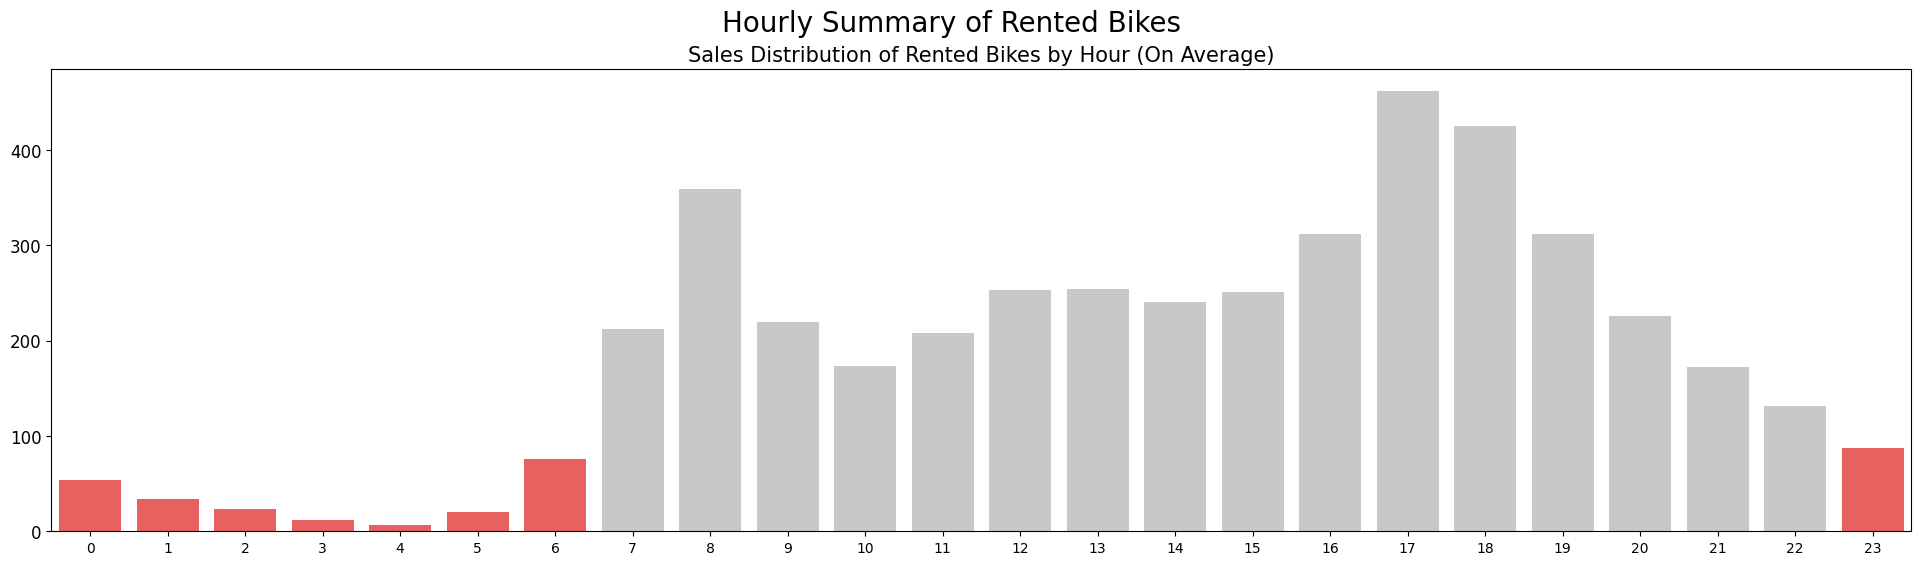

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))

colors = [None] * 24 # mengatur warna agar dapat sesuai dengan yang diinginkan

i = 0
while i < 24:
    if i < 7:
        colors[i] = "#fe4b4b"
    elif i > 22:
        colors[i] = "#fe4b4b"
    else:
        colors[i] = "#c8c8c8"
    i += 1


sns.barplot(x="hr", y="cnt", data=sum_hour_sales_byhour_top, palette=colors, ax=ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Sales Distribution of Rented Bikes by Hour (On Average)", loc="center", fontsize=15)
ax.tick_params(axis ='y', labelsize=12)


plt.suptitle("Hourly Summary of Rented Bikes", fontsize=20)
plt.show()

**Insight:**
- Berhasil mengurutkan dan menandai hari apa yang memiliki rata-rata penjualan sewa terbesar dan terkecil selama satu minggu.
- Berhasil mengurutkan dan menandai jam berapa yang memiliki rata-rata penjualan sewa terkecil selama satu hari.

## Analisis Lanjutan (Opsional)

In [26]:
def label_hour(hour): # mengelompokkan variable hr di hour_df menggunakan conditional statement
    if 7 <= hour <= 14:
        return "work hour"
    elif 15 <= hour <= 22:
        return "rush hour"
    else:
        return "rest hour"

hour_df['hour_label'] = hour_df['hr'].apply(label_hour)

hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [27]:
hour_df.groupby(by="hour_label").agg({
    "casual": ["max", "min", "mean", "std"],
    "registered": ["max", "min", "mean", "std"],
    "cnt": ["max", "min", "mean", "std"]
})

casual                           registered                  \
              max min       mean        std        max min        mean   
hour_label                                                               
rest hour      71   0   5.822482   8.746792        234   0   33.552976   
rush hour     367   0  52.463373  53.583358        886   4  234.022302   
work hour     362   0  48.247896  54.686912        808   1  191.774781   

                        cnt                              
                   std  max min        mean         std  
hour_label                                               
rest hour    39.102993  283   1   39.375458   44.950515  
rush hour   162.804590  977   6  286.485675  191.670025  
work hour   135.042601  839   1  240.022677  159.077296

In [28]:
sum_hour_sales_bylabel_top = hour_df.groupby(by="hour_label").cnt.mean().sort_values(ascending=False).reset_index()
sum_hour_sales_bylabel_top

,hour_label,cnt
0,rush hour,286.485675
1,work hour,240.022677
2,rest hour,39.375458


<ipython-input-29-dec67b5eff3a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hour_label", y="cnt", data=sum_hour_sales_bylabel_top, palette=colors, ax=ax)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning

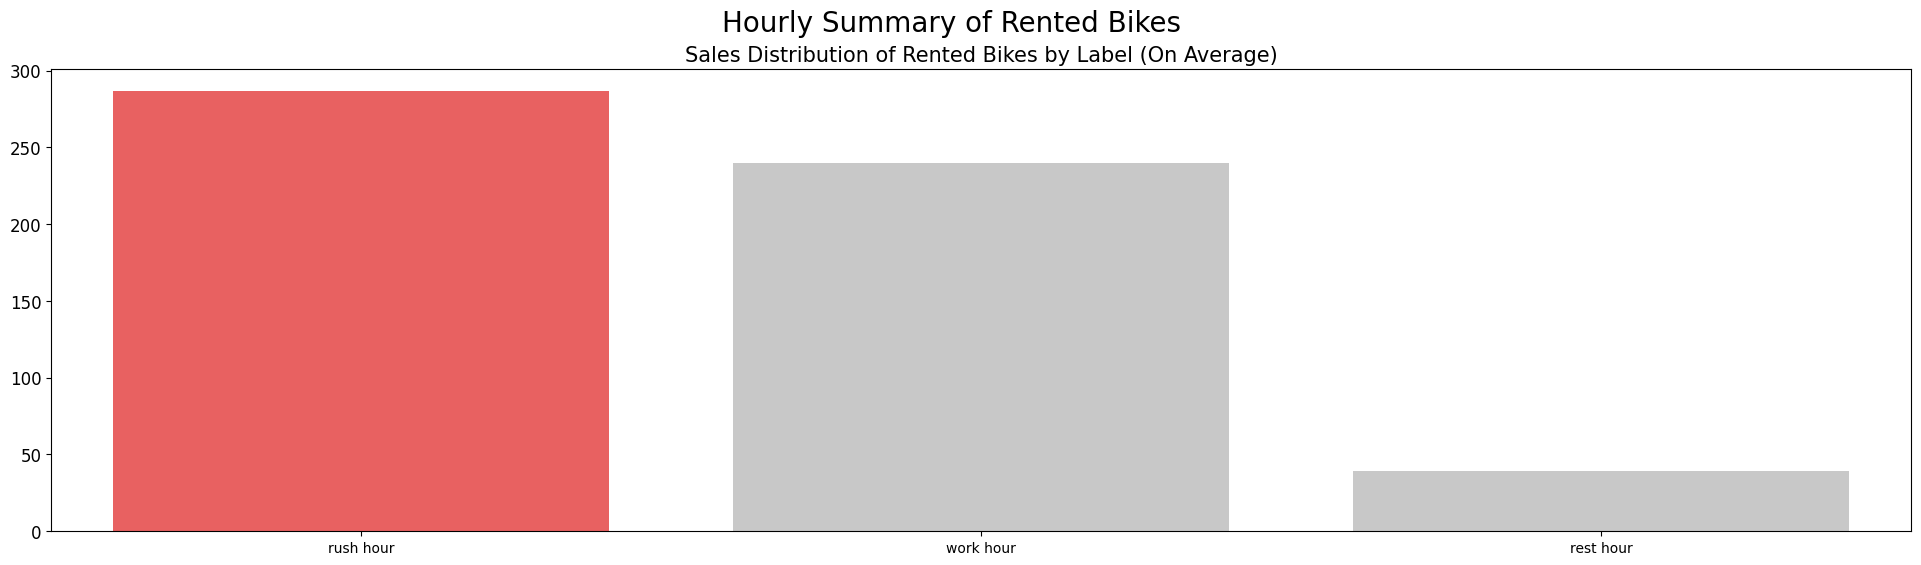

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))

colors = ["#fe4b4b", "#c8c8c8", "#c8c8c8"]


sns.barplot(x="hour_label", y="cnt", data=sum_hour_sales_bylabel_top, palette=colors, ax=ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Sales Distribution of Rented Bikes by Label (On Average)", loc="center", fontsize=15)
ax.tick_params(axis ='y', labelsize=12)


plt.suptitle("Hourly Summary of Rented Bikes", fontsize=20)
plt.show()

## Conclusion

- Apabila ingin mengekspansi kuantitas produk dalam waktu yang terbatas, hari apa yang menjadi hari yang ideal untuk mengimplementasikan ekspansi tersebut?

  **Jawab :** Dalam memilih hari yang ideal agar ekspansi kuantitas dapat menghasilkan hasil yang maksimal, kita perlu mencari tahu hari apa yang memiliki rata-rata hasil penjualan tertinggi. Kita dapati bahwa hari sabtu merupakan hari yang memiliki rata-rata hasil penjualan tertinggi, dan pada umumnya hari sabtu memang digunakan untuk orang-orang dalam meluangkan waktu mereka, sehingga ekpansi kuantitas cocok untuk dilakukan di hari sabtu.

- Anggap sebuah toko rental sepeda harus tutup sekali dalam sehari untuk beristirahat dan kembali membuka tokonya di hari berikutnya, maka pada jam berapa toko tersebut sebaiknya tutup dan buka kembali?

  **Jawab :** Serupa dengan pertanyaan pertama, kita bisa cari jam berapakah penyewaan sepeda mendapati angka tertingginya. Kita bisa simplifikasi atribut jam menjadi 3 cluster yang dilakukan di Analisis Lanjutan. Kita bisa lihat bahwa penyewaan sepeda tertinggi terjadi pada rush hour, yang mana sesuai dengan jadwal pekerja dan pelajar sehari-hari yang ingin pulang dari kantor/sekolahnya. Kita bisa menjawab pertanyaan kedua ini dengan melihat pada rentang jam berapakah penyewaan sepeda mencapai titik yang cenderung rendah, dan kita bisa melihat bahwa jam tutup toko yang ideal merupakan dari jam 23.00 dan buka kembali di jam 6.00.